In [1]:
import pandas as pd
import json

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
import pandas as pd
df1 = pd.read_csv("Multivriate_data.csv")

In [5]:
import numpy as np

y = df1['Label']
df1 = df1.drop("Label", axis=1)
X = np.asarray(df1)
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
X, y = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [6]:
import tensorflow as tf

from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import LSTM, Dropout,Dense,RepeatVector,TimeDistributed,Input,BatchNormalization,RepeatVector
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten

from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam as adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.models import load_model

In [7]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y_train)

In [8]:
yval1 = to_categorical(y_val)

In [9]:
from keras.layers import GlobalAveragePooling1D
model = Sequential()
model.add(LSTM(128, input_shape=(5,1)))
model.add(Dropout(rate=0.2))
model.add(RepeatVector(1))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(4)))
model.add(GlobalAveragePooling1D())
model.add(Dense(4,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics='acc')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 repeat_vector (RepeatVector  (None, 1, 128)           0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 1, 128)            131584    
                                                                 
 dropout_1 (Dropout)         (None, 1, 128)            0         
                                                                 
 time_distributed (TimeDistr  (None, 1, 4)             516       
 ibuted)                                                

In [10]:
X_train

array([[ 1.66841710e+01,  1.18719536e+01,  2.35834609e-01,
         5.60934647e+01, -1.92704121e+02],
       [ 7.35183796e+01,  9.27739994e+00,  1.57079633e+00,
         1.16536903e+02, -1.00000000e+02],
       [ 5.44536134e+01,  1.28591844e+01, -2.40252263e-13,
         3.70000000e+02, -1.24605764e+02],
       ...,
       [ 5.97949487e+01,  1.39344557e+01, -2.74669176e-13,
         3.70000000e+02, -1.34677806e+02],
       [ 6.13753438e+01,  8.17627105e+00,  1.57079633e+00,
        -2.50005598e+01, -1.00000000e+02],
       [ 1.43635909e+01,  1.20068814e+01,  1.28175411e+00,
        -4.01048733e+01, -2.94161753e+02]])

In [11]:
history= model.fit(X_train, y,
epochs=50,
batch_size=2048,
validation_data=(X_val,yval1),
shuffle=False)


Epoch 1/50
95/95 [==============================] - 19s 158ms/step - loss: 1.2141 - acc: 0.5172 - val_loss: 1.1675 - val_acc: 0.5215
Epoch 2/50
95/95 [==============================] - 15s 154ms/step - loss: 1.1188 - acc: 0.5395 - val_loss: 1.0417 - val_acc: 0.5609
Epoch 3/50
95/95 [==============================] - 15s 160ms/step - loss: 1.0039 - acc: 0.5726 - val_loss: 0.9198 - val_acc: 0.5986
Epoch 4/50
95/95 [==============================] - 14s 150ms/step - loss: 0.9004 - acc: 0.6123 - val_loss: 0.8532 - val_acc: 0.6259
Epoch 5/50
95/95 [==============================] - 15s 160ms/step - loss: 0.8411 - acc: 0.6400 - val_loss: 0.7892 - val_acc: 0.6559
Epoch 6/50
95/95 [==============================] - 16s 172ms/step - loss: 0.8051 - acc: 0.6547 - val_loss: 0.7595 - val_acc: 0.6657
Epoch 7/50
95/95 [==============================] - 15s 160ms/step - loss: 0.7757 - acc: 0.6648 - val_loss: 0.7347 - val_acc: 0.6725
Epoch 8/50
95/95 [==============================] - 15s 154ms/step - 

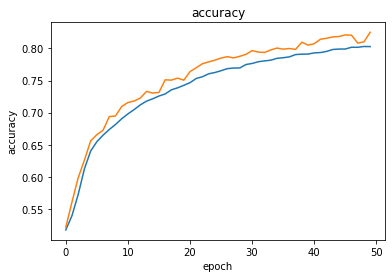

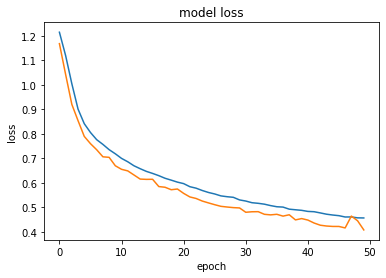

the model is rnn
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x000001761B3D94F0>
the confusion matrix is [[23156   749   648   307]
 [  860  7822   141   325]
 [ 1477    95  4917     1]
 [  820  2598   144  3449]]


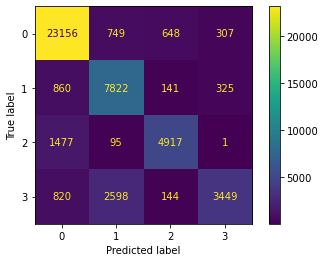

the accuracy for test is is 0.828137826517081
              precision    recall  f1-score   support

     class 0       0.88      0.93      0.91     24860
     class 1       0.69      0.86      0.77      9148
     class 2       0.84      0.76      0.80      6490
     class 3       0.84      0.49      0.62      7011

    accuracy                           0.83     47509
   macro avg       0.81      0.76      0.77     47509
weighted avg       0.83      0.83      0.82     47509



In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from time import time
from sklearn import metrics
yp =model.predict(X_test)
lr=0.001
opt=tf.keras.optimizers.Adam(lr)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.plot(history.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()


# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()
  
  
print("the model is rnn")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=[0,1,2,3])
disp.plot()

plt.show()  
print("the accuracy for test is is", accuracy_score(y_test,ypred))
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(actual, predicted, target_names=target_names))

